In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm, preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

In [2]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)
fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)



In [3]:
def count_results(y_test, y_predicted, y_predicted_proba):
    try:
        print('Accuracy score:')
        print(metrics.accuracy_score(y_test, y_predicted))
        print('Zero one loss score:')
        print(metrics.zero_one_loss(y_test, y_predicted))
        print('F1 score:')
        print(metrics.f1_score(y_test, y_predicted, average = None))
        print('\n')
        print(skplt.metrics.plot_precision_recall(y_test, y_predicted_proba))
        print(skplt.metrics.plot_roc(y_test, y_predicted_proba))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.rcParams['font.size'] = 10
        plt.show()
        print('\n')
        print('Hinge loss score:')
        print(metrics.hinge_loss(y_test, y_predicted_proba))
    except:
        pass

In [9]:
def train_model(dataset):

    test_sizes = [0.1, 0.2, 0.25, 0.375, 0.5, 0.625, 0.75]
    Cs = [0.1, 0.4, 1]


    x_dataset = dataset.data[0:35000]
    y_dataset = dataset.target[0:35000]

    for C in Cs:
        for test_size in test_sizes:
            print('-----------------------------------------------------------------------')
            print('Rozmiar testowy ' + str(test_size))
            print('Rozmiar treningowy ' + str(1 - test_size))
            print('C ' + C)
            x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=test_size)

            scaler = StandardScaler().fit(x_train)
            x_train = scaler.transform(x_train)
            x_test = scaler.transform(x_test)
            x_mnist = scaler.transform(x_mnist)

            linear_svc = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True), n_jobs=4).fit(x_train, y_train)

            y_predicted = linear_svc.predict(x_test)
            y_predicted_proba = linear_svc.predict_proba(x_test)
    
            count_results(y_test, y_predicted, y_predicted_proba)

In [6]:
from timeit import default_timer as timer

C
Accuracy score:
0.906
Zero one loss score:
0.09399999999999997
F1 score:
[0.95053763 0.95493934 0.89068826 0.88536813 0.92307692 0.87214612
 0.94427558 0.92167577 0.84244373 0.86363636]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


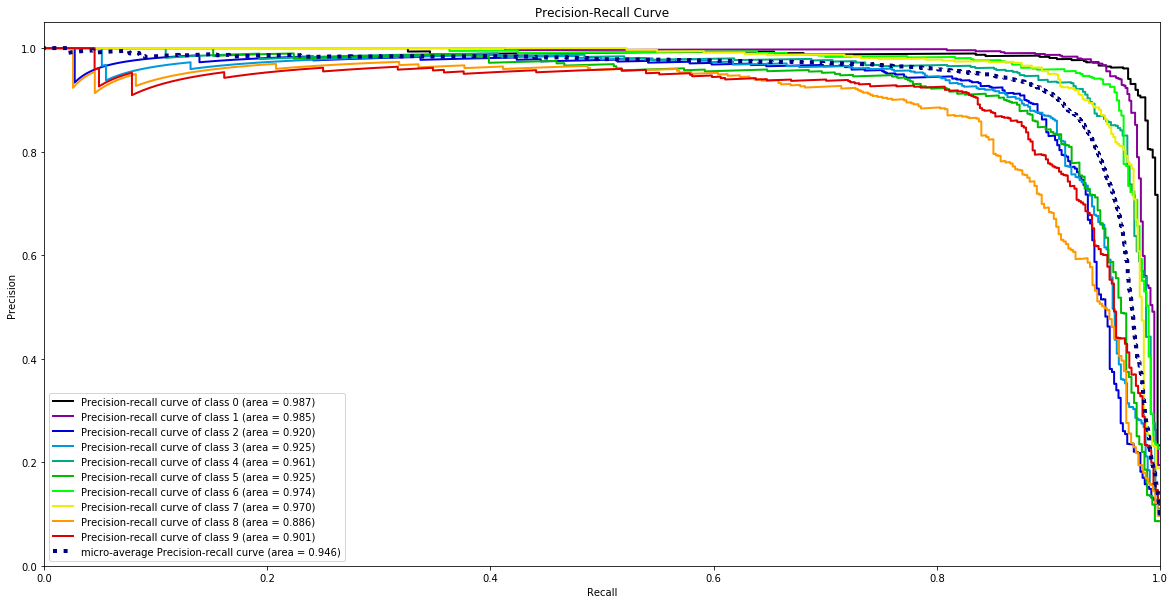

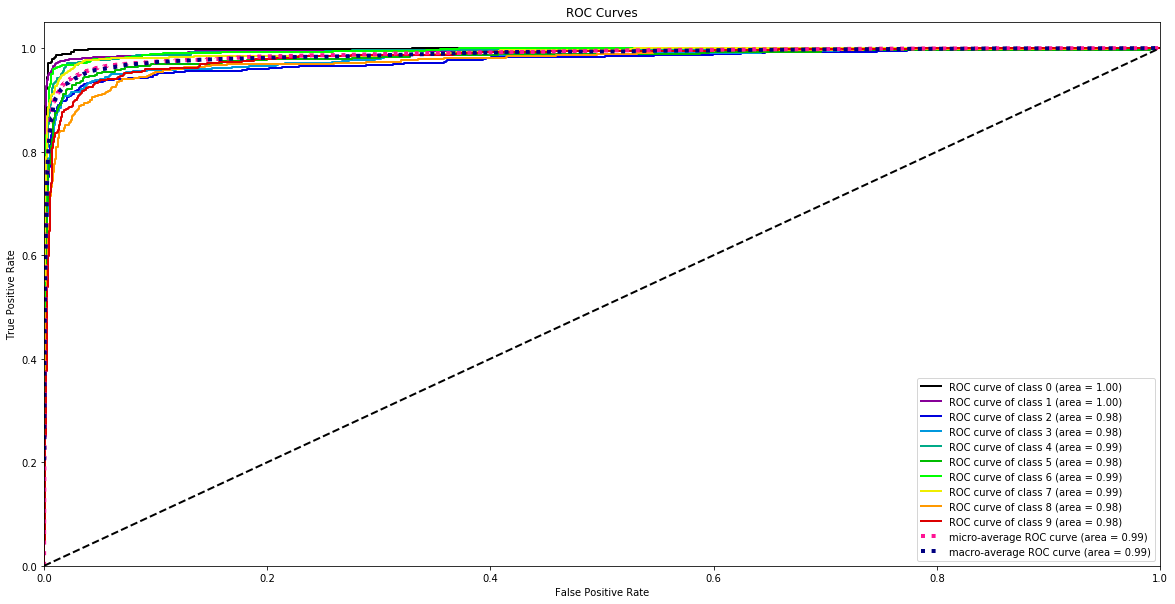



Hinge loss score:
0.363198498813877
1076.5893979999998


Not C
Accuracy score:
0.8974
Zero one loss score:
0.10260000000000002
F1 score:
[0.94911734 0.93884582 0.85128205 0.89908257 0.89051095 0.86914766
 0.93812375 0.91610415 0.8440367  0.86486486]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


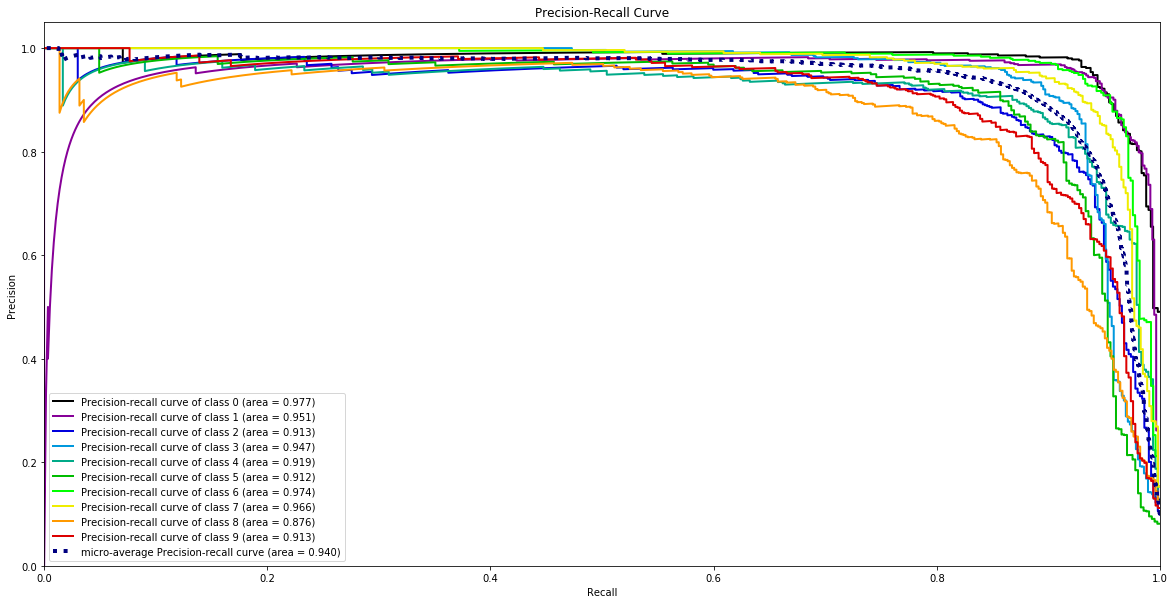

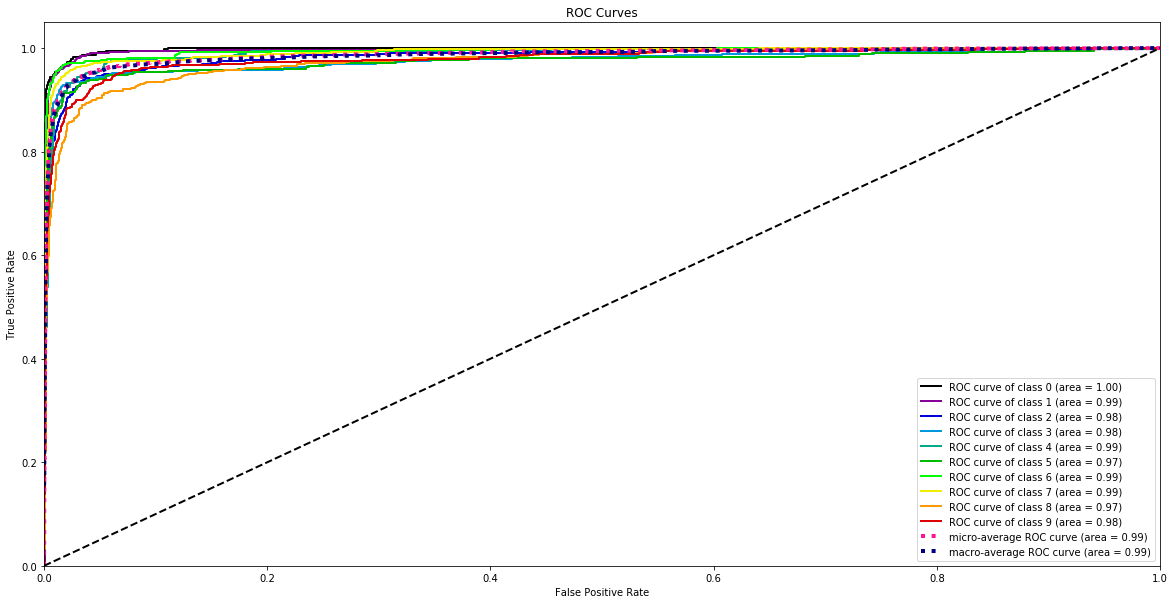



Hinge loss score:
0.4166572966679356
4032.7147032000003
